In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
#NASA Exoplanet Archieve of HAT_P_32b
# https://exoplanetarchive.ipac.caltech.edu/overview/HAT-P-32b

In [3]:
df = pd.read_csv("HAT_P_32b_literature.csv")#, header=None)
df = df.set_index('Parameter')

In [4]:
df

,Wang et al. 2019,Ivshina & Winn 2022,Kokori et al. 2022,Bonomo et al. 2017,Stassun et al. 2017,Nortmann et al. 2016,Zhao et al. 2014,Knutson et al. 2014,Gibson et al. 2013,Albrecht et al. 2012,Hartman et al. 2011,ExoFOP-TESS TOI
Parameter,,,,,,,,,,,,
RpRs,0.14886+0.00056-0.00054,---,---,---,---,0.1516376+0.0008740-0.0005450,---,---,0.1515+/-0.0012,0.1508+/-0.0004,0.1508+/-0.0004,---
a/R*,5.344+0.040-0.039,---,---,---,6.06+/-0.13,6.123+0.021-0.054,---,---,6.091+0.036-0.047,---,6.05 +0.03-0.04,---
e,0.159+0.051-0.028,---,---,<0.044,0.0,0,0.0072 +0.0700-0.0064,0.20+0.19-0.13,---,---,0.,---
i,88.98+0.68-0.85,---,---,88.90+/-0.40,88.90+/-0.40,89.33+0.58-0.80,88.9+/-0.4,---,89.12+0.61-0.68,---,88.9+/-0.4,---
P,2.15000820+/-0.00000013,2.15000790+/-0.00000014,2.15000825+/-0.00000010,2.15000825+/-0.00000012,2.150010+/-0.000001,2.1500080,2.15000805 +0.00000093-0.00000097,---,2.1500085+/-0.0000002,---,2.150008+/-0.000001,2.14999072037241+/-0.00001981489200
R,1.980+/-0.045,---,---,1.789+/-0.025,1.75+/-0.14,---,1.789+/-0.025,---,1.796+0.028-0.027,---,1.789+/-0.025,1.84106788854838+/-0.08786244051611
a,0.03397+0.00051-0.00050,---,---,0.03427+0.00040-0.00042,---,---,0.0343+/-0.0004,---,---,---,0.0343+/-0.0004,---
colour,#1f77b4,#ff7f0e,#2ca02c,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf,b,g


In [5]:
df_ref_list = df.columns

df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
df_R_list = df.loc['R'] #Planetary radius row
df_a_list = df.loc['a'] #Semi-major axis row
# df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
# df_w_list = df.loc['w'] #
df_color = df.loc['colour'] #Colours
# df_T_c_list = df.loc['T_c']
# df_transit_duration_list = df.loc['transit_duration']
df_a_Rs_list = df.loc['a/R*']

e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
# b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)
# T_c_list, T_c_ref_list = read_df_params(df_T_c_list, df_ref_list)
# transit_duration_list, transit_duration_ref_list = read_df_params(df_transit_duration_list, df_ref_list)
a_Rs_list, a_Rs_ref_list = read_df_params(df_a_Rs_list, df_ref_list)

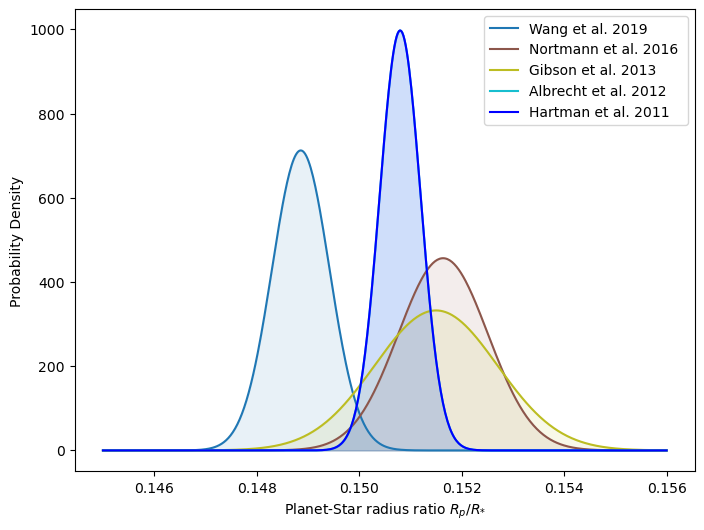

In [6]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.145, 0.156, 500)
for RpRs_obj, author in zip(RpRs_list, RpRs_ref_list):
    mu, upper, lower = RpRs_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)
        plt.fill_between(x, stats.norm.pdf(x, mu, sigma), 0, color=colour, alpha=.1)

plt.xlabel(r'Planet-Star radius ratio $R_{p}/R_{*}$')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

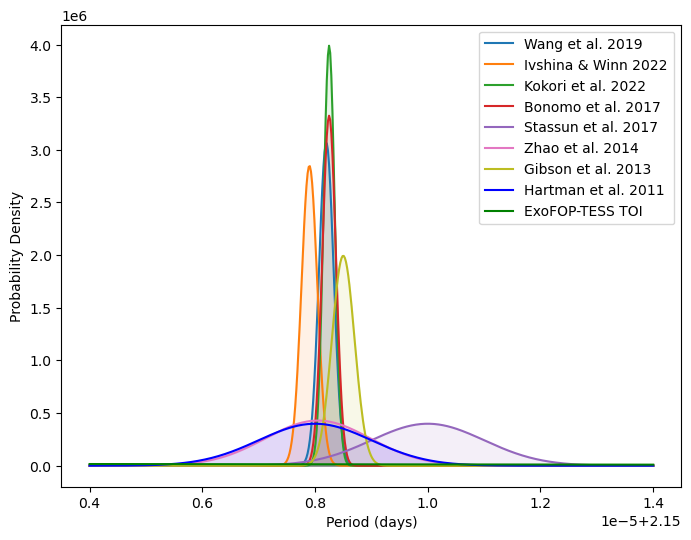

In [7]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(2.150004, 2.150014, 500)
for P_obj, author in zip(P_list, P_ref_list):
    mu, upper, lower = P_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)
        plt.fill_between(x, stats.norm.pdf(x, mu, sigma), 0, color=colour, alpha=.1)

plt.xlabel("Period (days)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

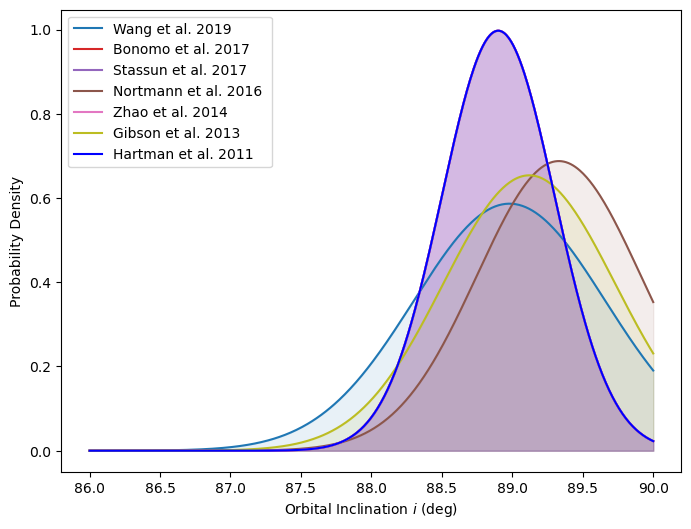

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(86, 90, 500)
for i_obj, author in zip(i_list, i_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)
        plt.fill_between(x, stats.norm.pdf(x, mu, sigma), 0, color=colour, alpha=.1)

plt.xlabel(r"Orbital Inclination $i$ (deg)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

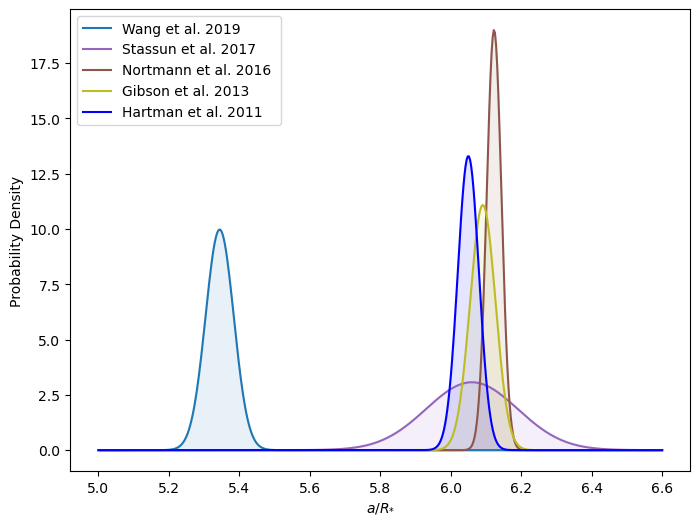

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(5, 6.6, 500)
for i_obj, author in zip(a_Rs_list, a_Rs_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)
        plt.fill_between(x, stats.norm.pdf(x, mu, sigma), 0, color=colour, alpha=.1)

plt.xlabel(r"$a/R_{*}$")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

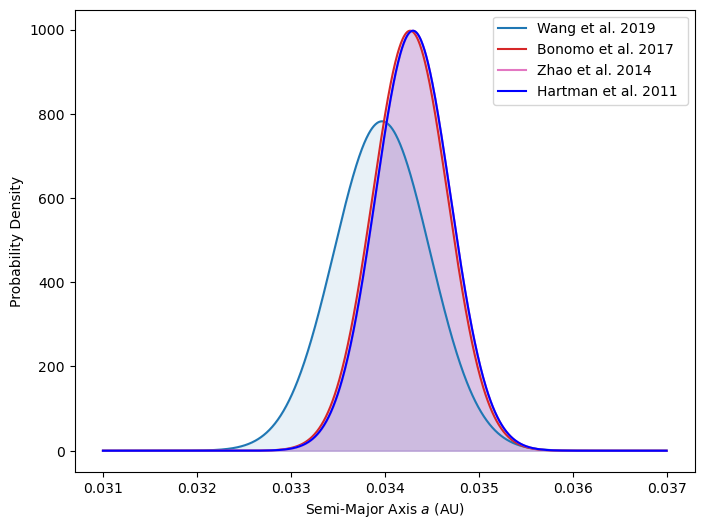

In [10]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.031, 0.037, 1000)
for a_obj, author in zip(a_list, a_ref_list):
    mu, upper, lower = a_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)
        plt.fill_between(x, stats.norm.pdf(x, mu, sigma), 0, color=colour, alpha=.1)

plt.xlabel(r'Semi-Major Axis $a$ (AU)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

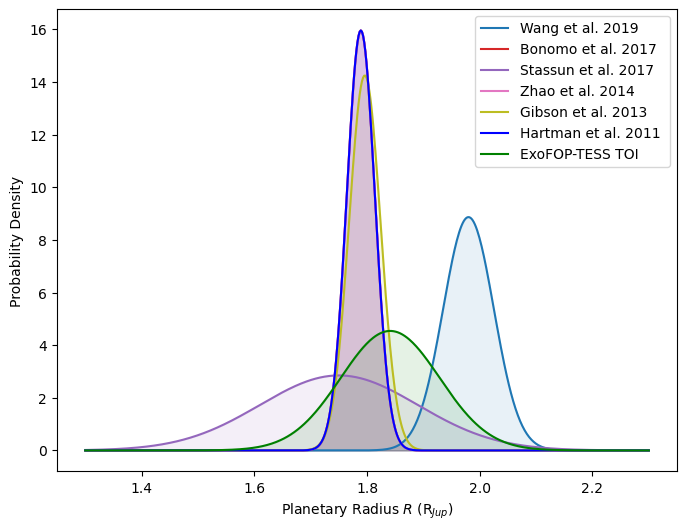

In [11]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(1.3, 2.3, 500)
for R_obj, author in zip(R_list, R_ref_list):
    mu, upper, lower = R_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)
        plt.fill_between(x, stats.norm.pdf(x, mu, sigma), 0, color=colour, alpha=.1)

plt.xlabel(r'Planetary Radius $R$ (R$_{Jup}$)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

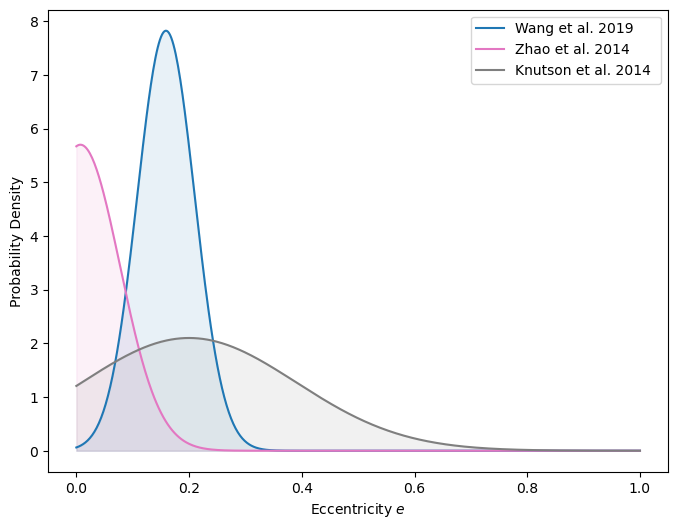

In [12]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.0, 1.0, 500)
for obj, author in zip(e_list, e_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)
        plt.fill_between(x, stats.norm.pdf(x, mu, sigma), 0, color=colour, alpha=.1)

plt.xlabel(r"Eccentricity $e$")
plt.ylabel("Probability Density")
ax.legend()
plt.show()